In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



# RF with data of Experiment 3


## Data preprocessing


In [99]:
df = pd.read_csv('Experiment_3.csv')
df['RSSI-Value-Smoothed'] = df['RSSI-Value'].rolling(window=5).mean()
df['RSSI-Value-Smoothed'] = df['RSSI-Value-Smoothed'].fillna(df['RSSI-Value'])

## RF Classification

In [100]:
bins = [0, 1, 2, 4, 6, 8, 10]
labels = ['0-1m', '1-2m', '2-4m', '4-6m', '6-8m', '8-10m']
df['Distance_category'] = pd.cut(df['Distance'], bins=bins, labels=labels, include_lowest=True)

In [101]:
#X = df[['RSSI-Value']]
X = df[['RSSI-Value-Smoothed']]  # Use smoothed RSSI values
y = df['Distance_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [102]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the SMOTE-augmented data
rf_classifier.fit(X_train_smote, y_train_smote)

y_pred = rf_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        0-1m       0.94      0.66      0.77       385
        1-2m       0.46      0.55      0.50       296
        2-4m       0.23      0.28      0.25       133
        4-6m       0.22      0.16      0.19       118
        6-8m       0.32      0.39      0.35       119
       8-10m       0.44      0.55      0.49       123

    accuracy                           0.50      1174
   macro avg       0.43      0.43      0.43      1174
weighted avg       0.55      0.50      0.51      1174



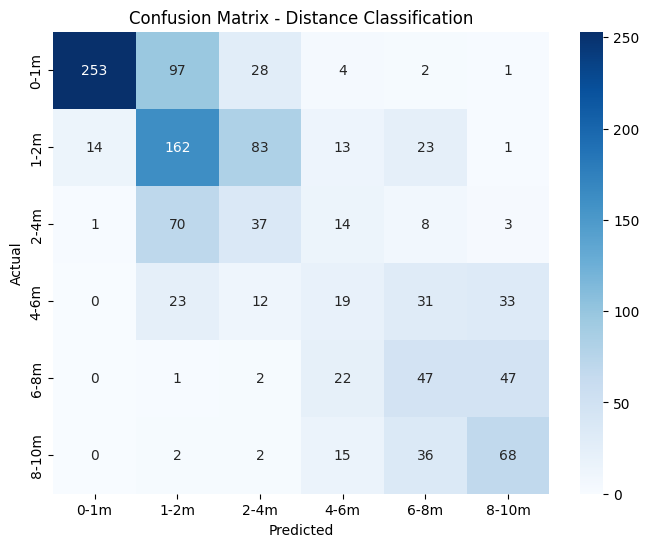

In [103]:
cm = confusion_matrix(y_test, y_pred, labels=['0-1m', '1-2m', '2-4m', '4-6m', '6-8m', '8-10m'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0-1m', '1-2m', '2-4m', '4-6m', '6-8m', '8-10m'],
            yticklabels=['0-1m', '1-2m', '2-4m', '4-6m', '6-8m', '8-10m'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Distance Classification')
plt.show()